# The Eigenvalue decomposition for symmetric matrices

In preparation for some of the material we will present in the coming sections, here we give a review of the eigenvalue decomposition with a particular interest in symmetric matrices. We will then look an important example of a symmetric matrix: a covariance matrix.

## Review of the eigenvalue decomposition

The general eigenvalue problem for an $n\times n$ matrix $\boldsymbol{A}$ is the problem of finding $n$ value vector pairs $(\lambda_1, \boldsymbol{u}_1),\dots, (\lambda_n, \boldsymbol{u}_n)$ satisfying

$$
\boldsymbol{Au}_i = \lambda_i \boldsymbol{u}_i.
$$


In words, the condition $\boldsymbol{Au} = \lambda \boldsymbol{u}$ means "applying the linear transformation $\boldsymbol{A}$ to $\boldsymbol{u}$ is the same as rescaling $\boldsymbol{u}$ by $\lambda$". For a general square matrix $\boldsymbol{A}$ and arbitrary vector $\boldsymbol{u}$, the vector $\boldsymbol{Au}$ will be a rotated _and_ rescaled version of $\boldsymbol{u}$, so the pair $(\lambda, \boldsymbol{u})$ must be a very special pair. Let's illustrate this with the matrix 

$$
\boldsymbol{A} = \begin{bmatrix}2&1\\ 1&2\end{bmatrix}
$$

Let's first see what this matrix does to two simple vectors, namely the standard basis vectors $\boldsymbol{e}_1 = (1,0), \boldsymbol{e}_2 = (0,1)$.

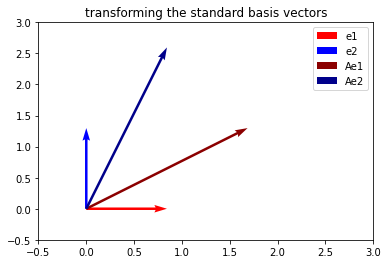

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# matrix A
A = np.array([[2, 1], [1, 2]])

# standard basis vectors in 2-d
e1 = np.array([1,0])
e2 = np.array([0,1])

e1 = np.array([1,0])
e2 = np.array([0,1])
origin = np.zeros(2)

plt.quiver(*origin, *e1, label='e1', scale=1, units='xy', color='red')
plt.quiver(*origin, *e2, label='e2', scale=1, units='xy', color='blue')
plt.quiver(*origin, *np.dot(A,e1), label='Ae1', scale=1, units='xy', color='darkred')
plt.quiver(*origin, *np.dot(A,e2), label='Ae2', scale=1, units='xy', color='darkblue')
plt.xlim(-.5,3)
plt.ylim(-.5,3)
plt.title('transforming the standard basis vectors')
plt.legend()
plt.show()

Indeed, we see that the standard basis vectors get rotated -- not just rescaled -- by $\boldsymbol{A}$, and so we cannot have that $\boldsymbol{Ae}_1 = \lambda \boldsymbol{e}_1$ or $\boldsymbol{Ae}_2 = \lambda \boldsymbol{e}_2$. On the other hand, consider the vectors


$$
\boldsymbol{u}_1 = \begin{pmatrix}1/\sqrt{2} \\ 1/\sqrt{2}\end{pmatrix}, \hspace{10mm} \boldsymbol{u}_2 = \begin{pmatrix}1/\sqrt{2}\\ -1/\sqrt{2}\end{pmatrix}
$$


Let's see what happens when we act on these vectors with $\boldsymbol{A}$.

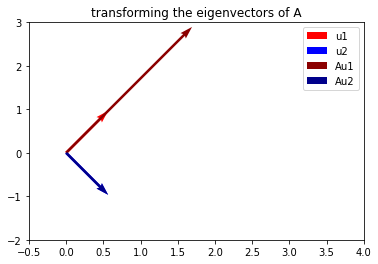

In [2]:
u1 = np.array([1/np.sqrt(2),1/np.sqrt(2)])
u2 = np.array([1/np.sqrt(2),-1/np.sqrt(2)])
origin = np.zeros(2)

plt.quiver(*origin, *u1, label='u1', scale=1, units='xy', color='red')
plt.quiver(*origin, *u2, label='u2', scale=1, units='xy', color='blue')
plt.quiver(*origin, *np.dot(A,u1), label='Au1', scale=1, units='xy', color='darkred')
plt.quiver(*origin, *np.dot(A,u2), label='Au2', scale=1, units='xy', color='darkblue')
plt.xlim(-.5,4)
plt.ylim(-2,3)
plt.title('transforming the eigenvectors of A')
plt.legend()
plt.show()

Indeed, this time we have that $\boldsymbol{Au}_1$ and $\boldsymbol{Au}_2$ _are_ just rescaled versions of $\boldsymbol{u}_1$ and $\boldsymbol{u}_2$. In particular, we can check that


$$
\boldsymbol{Au}_1 = 3\boldsymbol{u}_1\;\;\;\; \text{ and }\;\;\;\; \boldsymbol{Au}_2 = \boldsymbol{u}_2
$$


which means that $(3,\boldsymbol{u}_1)$ and $(1,\boldsymbol{u}_2)$ are the _eigenvalue/eigenvector_ pairs for the matrix $\boldsymbol{A}$.

In theory, the values $\lambda_i$ can be obtained by finding the roots of the _characteristic polynomial_ $p(\lambda) = \det(\boldsymbol{A} - \lambda \boldsymbol{I})$, and we find the associated eigenvectors by solving the linear system $(\boldsymbol{A}-\lambda \boldsymbol{I})\boldsymbol{u} = 0$. Note that the polynomial $p(\lambda)$ will be of degree $n$, and hence will have exactly $n$ zeros, and hence an $n\times n$ matrix will always have $n$ eigenvalue/eigenvector pairs. In practice, we use a methods provided in `numpy` to find these eigenvalues and vectors.

Note that if we form the eigenvector into the columns of an $n\times n$ matrix $\boldsymbol{U} = \begin{bmatrix} \boldsymbol{u_1} & \dots & \boldsymbol{u}_n \end{bmatrix}$ and the eigenvalues into a diagonal matrix $\boldsymbol{\Lambda} = \text{diag}(\lambda_1,\dots,\lambda_n)$, then this can equivalently be expressed as

$$
\boldsymbol{AU} = \boldsymbol{U\Lambda} \implies \boldsymbol{A} = \boldsymbol{U\Lambda U}^{-1} \,\,\,\, \text{(assuming $\boldsymbol{U}$ invertible)}
$$

This form is typically called the _eigenvalue decomposition_ of the matrix $\boldsymbol{A}$. In this section, we will focus on the case when $\boldsymbol{A}$ is a symmetric matrix.

## Symmetric matrices

In general, the eigenvalues and eigenvectors of a matrix may be real or complex valued, as they come from the roots of the polynomial $p(\lambda)$. For example, in the $2 \times 2$ case, with

$$
\boldsymbol{A} = \begin{bmatrix} a_{11}& a_{12}\\ a_{21} & a_{22}\end{bmatrix}
$$

the characteristic polynomial will be $p(\lambda) = \lambda^2 - (a_{11}+a_{22})\lambda + a_{11}a_{22}-a_{12}a_{21}$, which, by the quadratic formula, will have complex roots (and hence complex eigenvalues) whenever $(a_{11}+a_{22})^2 - 4(a_{11}a_{22}-a_{12}a_{21}) < 0$. On the other hand, if $\boldsymbol{A}$ is _symmetric_, so that $\boldsymbol{A}^\top = \boldsymbol{A}$, then the eigenvalues and eigenvectors of $\boldsymbol{A}$ will always satisfy the following two properties:

- The eigenvalues of a symmetric matrix $\boldsymbol{A}$ are always real numbers.
- The eigenvectors of a symmetric matrix $\boldsymbol{A}$ are always orthogonal.

In particular, the latter condition means that the matrix $\boldsymbol{U}$ of eigenvectors is an _orthogonal matrix_ satisfying $\boldsymbol{U^\top U} = \boldsymbol{I}$ and $\boldsymbol{UU^\top} = \boldsymbol{I}$ (since $\boldsymbol{U}$ is square). This means that $\boldsymbol{U}^{-1} = \boldsymbol{U}^\top$, and so in the symmetric case we can simplify the eigenvalue decomposition:

$$
\boldsymbol{A} = \boldsymbol{U\Lambda U}^\top.
$$

Here we briefly provide proofs for both of the above statements about the eigenvalues and eigenvectors of symmetric matrices $\boldsymbol{A}$.

**Eigenvalues are real numbers.** Let's quickly see why symmetric matrices always have real-valued eigenvalues. For a number/vector $x$, let $\bar{x}$ denote its complex conjugate (for a vector, this is just the complex conjugate in each coordinate). Then for any real matrix $\boldsymbol{A}$, let $(\lambda, \boldsymbol{v})$ be an eigenvalue/eigenvector pair of $\boldsymbol{A}$. Since $\boldsymbol{A}$ is real-valued, we have that $\overline{\boldsymbol{Av}} = \bar{\lambda}\bar{\boldsymbol{v}}$. Then if $\boldsymbol{A}=\boldsymbol{A}^\top$, we have

$$
\bar{\boldsymbol{v}}^\top \boldsymbol{A} \boldsymbol{v} = \bar{\boldsymbol{v}}^\top (\lambda \boldsymbol{v}) = \lambda \bar{\boldsymbol{v}}^\top \boldsymbol{v}
$$

and

$$
\bar{\boldsymbol{v}}^\top \boldsymbol{A v} = \bar{\boldsymbol{v}}^\top \boldsymbol{A^\top v} = (\boldsymbol{A}\bar{\boldsymbol{v}}^\top)\boldsymbol{v} = \bar{\lambda}\bar{\boldsymbol{v}}^\top \boldsymbol{v}.
$$

Therefore $\lambda \bar{\boldsymbol{v}}^\top \boldsymbol{v} = \bar{\lambda}\bar{\boldsymbol{v}}^\top \boldsymbol{v}$ which implies $\lambda = \bar{\lambda}$, and so $\lambda$ must be a real number.

**Eigenvectors are orthogonal.** Next, let's see why the eigenvectors of symmetric matrices are orthogonal. Suppose $(\lambda, \boldsymbol{u})$ and $(\mu, \boldsymbol{v})$ are two eigenvalue/eigenvector pairs for a symmetric matrix $\boldsymbol{A}$ such that $\lambda \neq \mu$ (i.e. they are distinct eigenvalues). Then $\boldsymbol{Au} = \lambda \boldsymbol{u}$ and $\boldsymbol{Av} = \mu \boldsymbol{v}$. Then

$$
\begin{align*}
\lambda \boldsymbol{u^\top v} &= (\lambda \boldsymbol{u})^\top \boldsymbol{v} = (\boldsymbol{Au})^\top \boldsymbol{v}\\
&= \boldsymbol{u}^\top \underbrace{\boldsymbol{A}^\top}_{=\boldsymbol{A}} \boldsymbol{v}= \boldsymbol{u}^\top (\boldsymbol{Av})\\ &= \boldsymbol{u}^\top (\mu \boldsymbol{v}) = \mu \boldsymbol{u^\top v}
\end{align*}
$$

Thus, rearranging we get

$$
(\lambda - \mu)\boldsymbol{u^\top v} = 0 \implies \boldsymbol{u^\top v} = 0
$$

since $(\lambda - \mu) \neq 0$, because by assumption the eigenvectors are orthogonal.

Let's see an example in Python, using the `np.linalg.eig(A)` function to find eigenvalues. To find a symmetric matrix $\boldsymbol{A}$, we will use the following approach: first, draw a random $n\times n$ matrix $\boldsymbol{B}$, and then let $\boldsymbol{A} = \boldsymbol{B^\top B}$.

In [3]:
import numpy as np

n = 10
B = np.random.normal(size=(n,n))
A = np.dot(B.T, B) # B^T B is always a symmetric matrix

Lambda, U = np.linalg.eig(A)
Lambda = np.diag(Lambda) # numpy returns Lambda as an array, so let's make it a diagonal matrix

Now let's verify that $\boldsymbol{A} = \boldsymbol{U\Lambda U^\top}$.

In [4]:
ULUT = np.dot(U, np.dot(Lambda, U.T))
np.allclose(A, ULUT)

True

Indeed, the two matrices are the same. Next, let's check that $\boldsymbol{U}$ is in fact orthogonal, by checking that $\boldsymbol{U^\top U} = \boldsymbol{I}$:

In [5]:
UTU = np.dot(U.T, U).round(8)
UTU

array([[ 1.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,  0.],
       [ 0.,  1., -0., -0.,  0., -0.,  0., -0., -0., -0.],
       [-0., -0.,  1., -0.,  0.,  0., -0.,  0.,  0.,  0.],
       [-0., -0., -0.,  1.,  0.,  0.,  0.,  0.,  0., -0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0., -0., -0.,  0.],
       [-0., -0.,  0.,  0.,  0.,  1., -0.,  0.,  0., -0.],
       [ 0.,  0., -0.,  0.,  0., -0.,  1.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0.,  0.,  0.,  1.,  0., -0.],
       [ 0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  1., -0.],
       [ 0., -0., -0., -0.,  0., -0., -0., -0., -0.,  1.]])

We get the identity back, and so $\boldsymbol{U}$ is in fact orthogonal.

## Covariance (and covariance-ish) matrices

Now that we've introduced the eigenvalue decomposition for symmetric matrices, we can focus on a particular example of symmetric matrix that will be of interest in this course: a covariance matrix.

At the population level, for a random vector $\boldsymbol{x}\in \mathbb{R}^p$ with mean $\boldsymbol{\mu} = \mathbb{E}[\boldsymbol{x}]$, the covariance matrix is defined as 

$$
\boldsymbol{\Sigma} = \mathbb{E}[(\boldsymbol{x}-\boldsymbol{\mu})(\boldsymbol{x}-\boldsymbol{\mu})^\top] = \begin{bmatrix}\sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1p}\\
\sigma_{21} & \ddots & \vdots & \vdots \\ \vdots & & & \vdots\\ \sigma_{p1} & \cdots & \cdots & \sigma_{p}^2\end{bmatrix}
$$

where $\sigma_{j}^2 = \text{Var}[x_j]$ and $\sigma_{jk} = \text{Cov}[x_j, x_k]$. Since $\sigma_{jk} = \text{Cov}[x_j, x_k] = \text{Cov}[x_k, x_j] = \sigma_{kj}$, the matrix $\boldsymbol{\Sigma}$ is clearly a symmetric matrix.

The situation is similar for a sample covariance matrix: given a matrix of data $\boldsymbol{X} \in \mathbb{R}^{n\times p}$ containing $n$ observations, the sample covariance matrix can be computed as

$$
\boldsymbol{C} = \frac{1}{n}\boldsymbol{X}_c^\top \boldsymbol{X}_c
$$

where $\boldsymbol{X}_c$ is the _centered_ version of the matrix $\boldsymbol{X}$ -- i.e. the means of each column have been subtracted. It's easy to see that the matrix $\boldsymbol{C}$ is also symmetric. Let's construct an example of a covariance matrix from data drawn from a multivariate normal distribution.

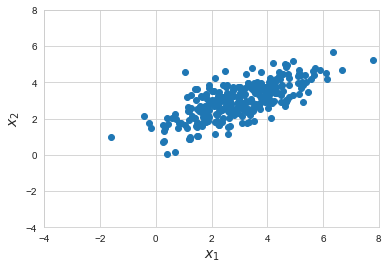

In [6]:
# makes it easier to see the origin
import seaborn as sns 
sns.set_style("whitegrid")
np.random.seed(42)

# generate data
mean = np.array([3,3])
cov = np.array([[2,1], [1, 1]])
X = np.random.multivariate_normal(mean, cov, 300)

# plot data
plt.scatter(X[:,0], X[:,1])
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-4,8)
plt.ylim(-4,8)
plt.show()

Before computing the covariance matrix for this data, let's first consider just the symmetric matrix $\frac{1}{n}\boldsymbol{X^\top X}$ (i.e. without centering the columns). Below we compute this matrix and calculate its eigenvalues and eigenvectors using `numpy`.

In [7]:
K = X.T@X/X.shape[0]
eigenvalues, eigenvectors = np.linalg.eig(K)

print(eigenvectors)
print(eigenvalues)

[[ 0.72623706 -0.68744434]
 [ 0.68744434  0.72623706]]
[20.52310737  0.45987617]


The eigenvectors are two unit vectors, which we will visualize shortly. Interestingly, one of the eigenvalues is much larger than the other -- indicating that there is one direction along which the majority of the "action" of $\frac{1}{n}\boldsymbol{X^\top X}$ occurs. To visualize this, we overlay the vectors $\lambda_i \boldsymbol{u}_i$ on top of our previous scatterplot.

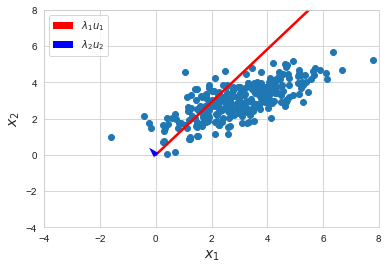

In [8]:
# plot data
plt.scatter(X[:,0], X[:,1])
plt.quiver(*origin, *(eigenvectors[:,0]*eigenvalues[0]), label=r'$\lambda_1 u_1$', scale=1, units='xy', color='red')
plt.quiver(*origin, *(eigenvectors[:,1]*eigenvalues[1]), label=r'$\lambda_2 u_2$', scale=1, units='xy', color='blue')
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.xlim(-4,8)
plt.ylim(-4,8)
plt.show()

As we can see from the plot, the large direction (associated with the big eigenvalue), seems to roughly point in the direction along which the two features correlate, though it appears to be a bit off. We can make this much better by first centering the data matrix $\boldsymbol{X}$ and computing the covariance matrix $\boldsymbol{C}$.

To center the data matrix $\boldsymbol{X}$, we can use a convenient matrix called the _centering matrix_ $\boldsymbol{H}_n = \boldsymbol{I} - \frac{1}{n}\boldsymbol{11^\top}$. It's a nice exercise to check that the matrix $\boldsymbol{X}_c = \boldsymbol{H}_n\boldsymbol{X}$ has the centered columns we desire. Here, we will check this numerically.

In [9]:
# define centering matrix
Hn = np.eye(X.shape[0]) - np.ones(shape=(X.shape[0],X.shape[0]))/X.shape[0]

# get centered data
Xc = Hn@X

# check that the columns actually have mean zero
print(np.mean(Xc[:,0]), np.mean(Xc[:,1]))

3.375077994860476e-16 -2.457293627837013e-16


Indeed, this works! Let's see what the centered data looks like in comparison to the original data.

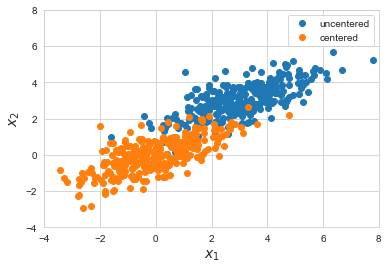

In [10]:
# plot data
plt.scatter(X[:,0], X[:,1], label="uncentered")
plt.scatter(Xc[:,0], Xc[:,1], label="centered")
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.xlim(-4,8)
plt.ylim(-4,8)
plt.show()

As we might expect, centering the columns of $\boldsymbol{X}$ simply shifts all the points to be centered around the origin. Now that we have our centered data, we can compute the covariance matrix $\boldsymbol{C} = \frac{1}{n}\boldsymbol{X}_c^\top \boldsymbol{X}_c$.

In [11]:
C = Xc.T@Xc/X.shape[0]
C

array([[1.92047819, 0.95424773],
       [0.95424773, 0.93758217]])

(Note that the matrix $\boldsymbol{C}$ looks a lot like the covariance matrix we used to generate a data from the multivariate normal distribution - it's actually the maximum likelihood estimator for this matrix).

Let's now compute the eigenvalues and eigenvectors of this matrix and overlay them on our data the same way we did for the uncentered data.

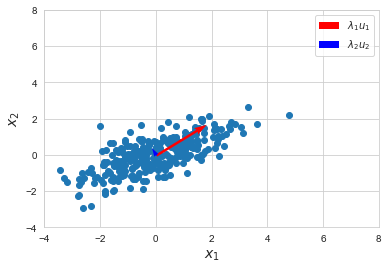

In [12]:
# get eigenthings
eigenvalues, eigenvectors = np.linalg.eig(C)

# plot data
plt.scatter(Xc[:,0], Xc[:,1])
plt.quiver(*origin, *(eigenvectors[:,0]*eigenvalues[0]), label=r'$\lambda_1 u_1$', scale=1, units='xy', color='red')
plt.quiver(*origin, *(eigenvectors[:,1]*eigenvalues[1]), label=r'$\lambda_2 u_2$', scale=1, units='xy', color='blue')
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.xlim(-4,8)
plt.ylim(-4,8)
plt.show()

Now the eigenvectors (scaled by the corresponding eigenvalues) seem to capture very naturally the _directions_ along which $X_1$ and $X_2$ correlate. In the next section, we will discuss a statistical technique called _principal components analysis_ which explicitly utilizes this fact to extract structure in data and/or perform dimensionality reduction.